<a href="https://colab.research.google.com/github/chitalekunal/MelonamaAssignment/blob/main/CNN_Melonama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import zipfile
import os

zip_file = '/content/drive/MyDrive/CNN_assignment.zip'
extract_dir = '/content/drive/MyDrive/CNN_assignment'


In [59]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [60]:
data_dir_train = pathlib.Path(extract_dir+"/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
data_dir_test = pathlib.Path(extract_dir+'/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [61]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

118
2239


In [62]:
batch_size = 32
img_height = 180
img_width = 180

In [63]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4618 files belonging to 9 classes.
Using 3695 files for training.


In [64]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [65]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


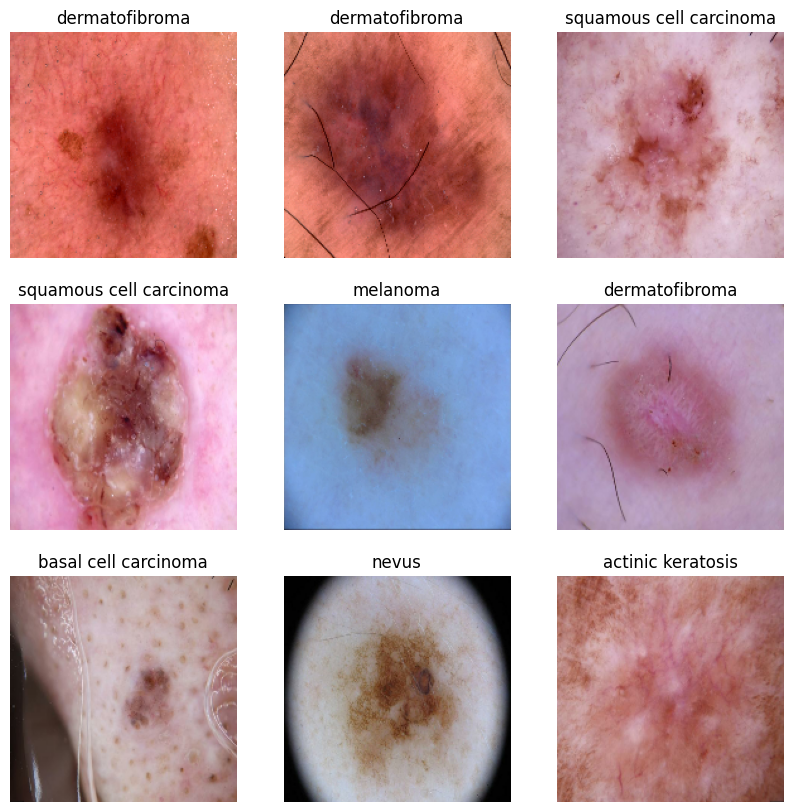

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [67]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [68]:
target_labels = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.compile(optimizer=keras.optimizers.Adamax(),
              loss=keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.1199 - loss: 3.2064 - val_accuracy: 0.1499 - val_loss: 2.1972
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.1099 - loss: 2.1972 - val_accuracy: 0.1499 - val_loss: 2.1972
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1205 - loss: 2.1972 - val_accuracy: 0.1499 - val_loss: 2.1972
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1189 - loss: 2.1972 - val_accuracy: 0.1499 - val_loss: 2.1972
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1114 - loss: 2.1972 - val_accuracy: 0.1499 - val_loss: 2.1972
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1162 - loss: 2.1972 - val_accuracy: 0.1499 - val_loss: 2.1972
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1167 - loss: 2.1972 - val_accuracy: 0.1499 - val_loss: 2.1972
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1194 - loss: 2.1972 - val_ac

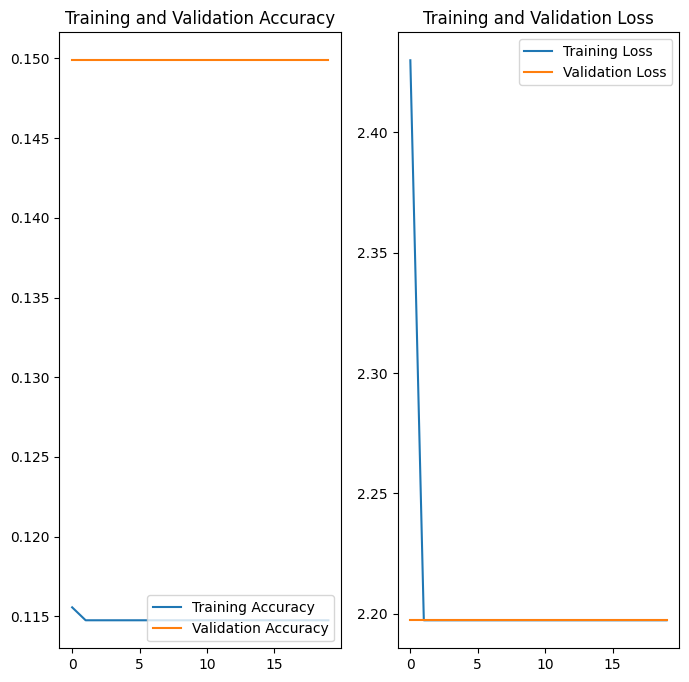

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model's training accuracy shows a steady increase of upto 90%, while validation accuracy remains consistently around 55%.

A high training accuracy suggests the model has effectively captured the noise within the data. However, its poor performance on validation data indicates a lack of generalizability.

These observations confirm the presence of overfitting. To address this issue, augmentation techniques will be employed. Given the limited training data available, new samples will be generated by making slight modifications to existing data (such as horizontal/vertical image flipping, minor image rotations, etc.), which will then be used for training the model.

In [73]:
augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.1),
])

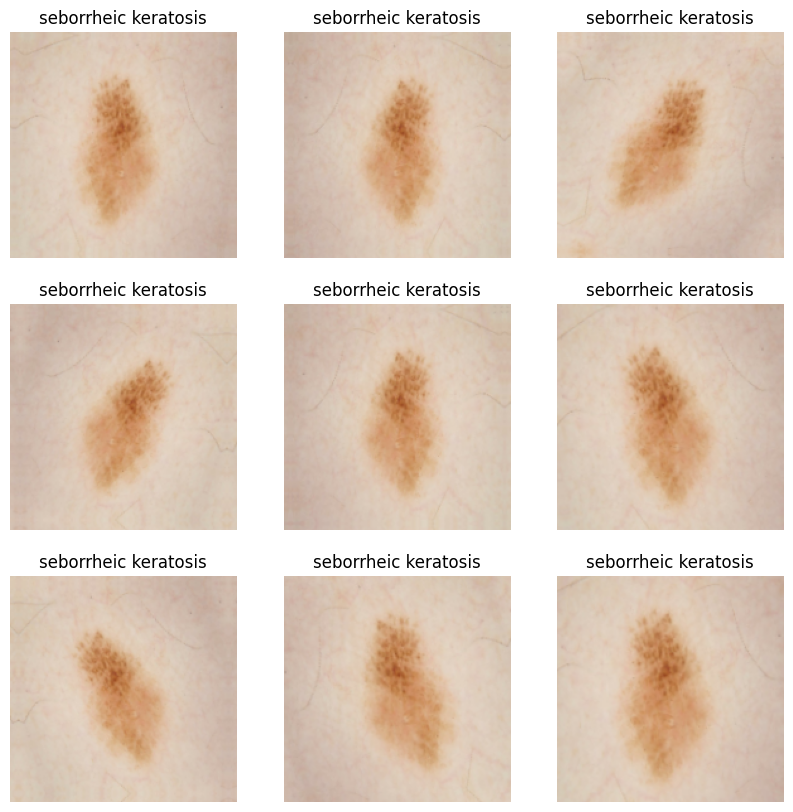

In [74]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

In [75]:
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [77]:
his = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.1056 - loss: 2.8695 - val_accuracy: 0.0425 - val_loss: 2.1972
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1107 - loss: 2.1972 - val_accuracy: 0.0425 - val_loss: 2.1972
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1060 - loss: 2.1972 - val_accuracy: 0.0425 - val_loss: 2.1972
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1049 - loss: 2.1972 - val_accuracy: 0.0425 - val_loss: 2.1972
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1144 - loss: 2.1972 - val_accuracy: 0.0425 - val_loss: 2.1972
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1098 - loss: 2.1972 - val_accuracy: 0.0425 - val_loss: 2.1972
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1038 - loss: 2.1972 - val_accuracy: 0.0425 - val_loss: 2.1972
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0961 - loss: 2.1972 - val_accu

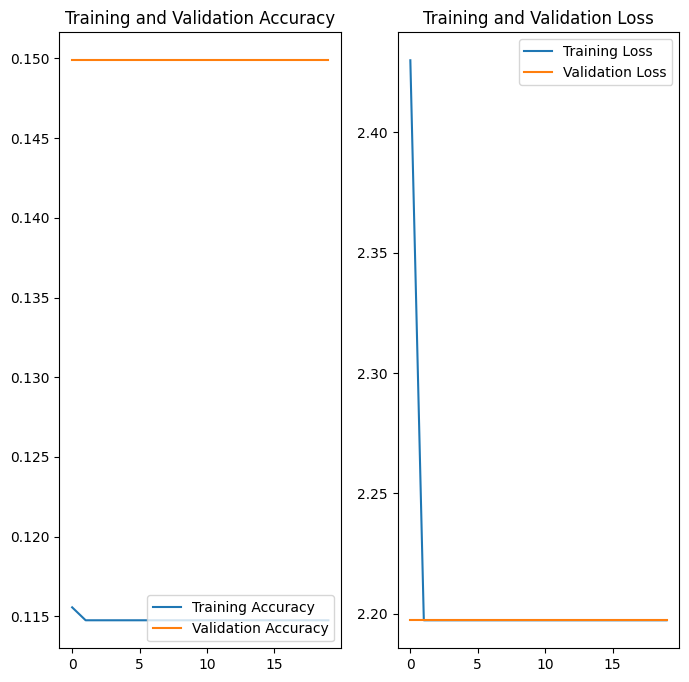

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [79]:
from glob import glob

images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
image_dict = dict(zip(images_path_list, lesions_list))
lesions_df = pd.DataFrame(list(image_dict.items()), columns=['Image Path', 'Label'])


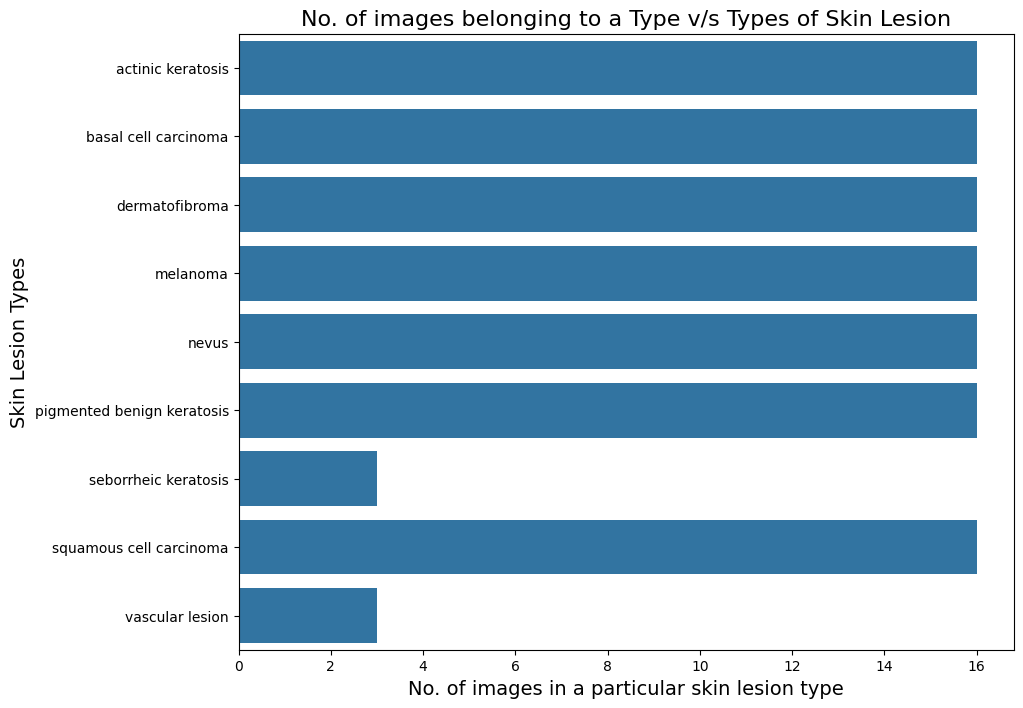

In [80]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=lesions_df)
plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

A clear class imbalance is evident within the training data.

The class "seborrheic keratosis" comprises the smallest proportion of samples, accounting for approximately 3.44%.

"Pigmented benign keratosis" and "melanoma" significantly outweigh other classes, representing approximately 20.63% and 19.56% of the data, respectively.

In [81]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset)+'/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EA04B397B10>: 100%|██████████| 500/500 [00:19<00:00, 25.90 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EA04B111050>: 100%|██████████| 500/500 [00:18<00:00, 26.81 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=6668x4479 at 0x7EA0B09B7CD0>: 100%|██████████| 500/500 [07:37<00:00,  1.09 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1503x1129 at 0x7EA04B299150>: 100%|██████████| 500/500 [01:07<00:00,  7.46 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1022x767 at 0x7EA04B7BC090>: 100%|██████████| 500/500 [00:40<00:00, 12.34 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EA04B320ED0>: 100%|██████████| 500/500 [00:17<00:00, 28.97 Samples/s]


Initialised with 3 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EA04B2B1D50>: 100%|██████████| 500/500 [00:39<00:00, 12.55 Samples/s]


Initialised with 16 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=6668x4399 at 0x7EA04B654150>: 100%|██████████| 500/500 [08:05<00:00,  1.03 Samples/s]


Initialised with 3 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EA0B0516CD0>: 100%|██████████| 500/500 [00:17<00:00, 28.34 Samples/s]


In [82]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


In [83]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/output/actinic keratosis_original_ISIC_0025427.jpg_da2debe7-6d7e-43b0-9659-664babe0b604.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/output/actinic keratosis_original_ISIC_0024470.jpg_b1c704a0-3a74-4a1d-ab46-fba7f3826c8f.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/output/actinic keratosis_original_ISIC_0010889.jpg_64d480c6-3dfd-4067-b8d0-28f8523604c1.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/output/actinic keratosis_original_ISIC_0024948.jpg_0aa091bd-5f36-405d-9ebd-0fcd34670078.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis

In [84]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [88]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image Path','Label'])
new_df = lesions_df + df2
new_df.shape

(9000, 2)

In [89]:
new_df['Label'].value_counts()

,count
Label,
actinic keratosisactinic keratosis,16
basal cell carcinomaactinic keratosis,16
dermatofibromaactinic keratosis,16
melanomaactinic keratosis,16
nevusactinic keratosis,16
pigmented benign keratosisactinic keratosis,16
squamous cell carcinomaactinic keratosis,16
seborrheic keratosisactinic keratosis,3
vascular lesionactinic keratosis,3


In [90]:
batch_size = 32
img_height = 180
img_width = 180
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [95]:
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.5594 - loss: 3.1442 - val_accuracy: 0.2058 - val_loss: 28.7560
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9039 - loss: 0.2883 - val_accuracy: 0.2237 - val_loss: 31.1492
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9460 - loss: 0.2072 - val_accuracy: 0.2304 - val_loss: 14.8514
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9634 - loss: 0.1331 - val_accuracy: 0.1991 - val_loss: 18.7365
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9519 - loss: 0.1668 - val_accuracy: 0.2013 - val_loss: 17.7936
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9363 - loss: 0.2630 - val_accuracy: 0.1566 - val_loss: 20.5096
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9568 - loss: 0.1668 - val_accuracy: 0.2327 - val_loss: 17.4151
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9542 - loss: 0.2214 - 

In [100]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 180, 180, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,970,301 (45.66 MB)

 Trainable params: 3,990,025 (15.22 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 7,980,052 (30.44 MB)

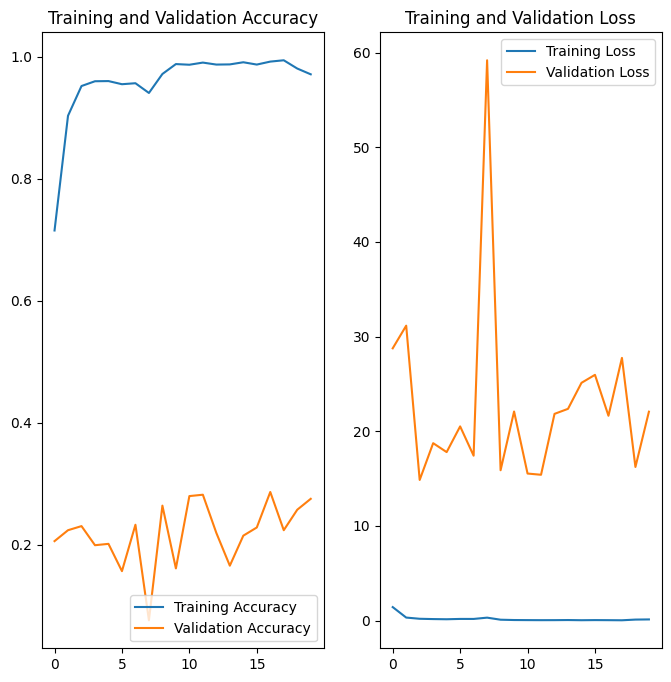

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Actual Class: basal cell carcinoma
Predicted Class: squamous cell carcinoma


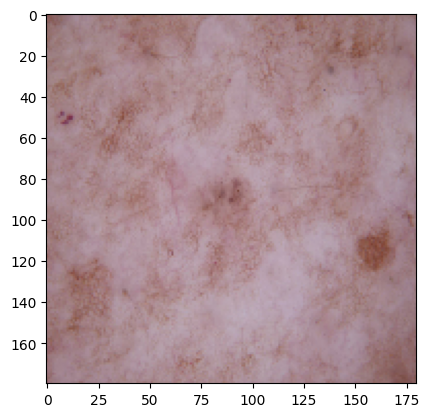

In [101]:
from tensorflow.keras.preprocessing.image import load_img

image_path_test = os.path.join(data_dir_test, class_names[1], '*')
test_image = glob(image_path_test)
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual Class: " + class_names[1] +'\n'+ "Predicted Class: " + predicted_class)